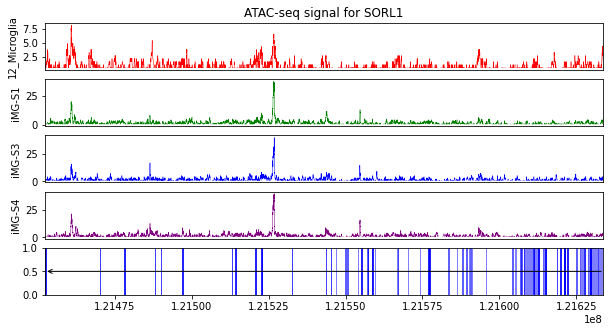

In [198]:
import pyBigWig
import matplotlib.pyplot as plt
import pyensembl
from matplotlib.patches import FancyArrowPatch

# Instantiate the Ensembl database object
ensembl = pyensembl.EnsemblRelease()

# Define the gene name you want to get the chromosome for
gene_name = "SORL1"

gene = ensembl.genes_by_name(gene_name)[0]


# Open the .bw file
bw1 = pyBigWig.open("12_Microglia.bw")
bw2 = pyBigWig.open("iMG-S1.bw")
bw3 = pyBigWig.open("iMG-S3.bw")
bw4 = pyBigWig.open("iMG-S4.bw")

# Define the genomic region you want to analyze
chromosome = gene.contig
start = gene.start
end = gene.end

# Extract the ATAC-seq signal data for the region
signal1 = bw1.values(chromosome, start, end)
signal2 = bw2.values(chromosome, start, end)
signal3 = bw3.values(chromosome, start, end)
signal4 = bw4.values(chromosome, start, end)

# Plot the ATAC-seq signal in a figure
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, figsize=(10, 5))
ax1.plot(signal1, color="red", linewidth=0.5)
ax1.set_xticks([])
ax1.set_ylabel("12_Microglia")
ax2.plot(signal2, color="green", linewidth=0.5)
ax2.set_xticks([])
ax2.set_ylabel("iMG-S1")
ax3.plot(signal3, color="blue", linewidth=0.5)
ax3.set_xticks([])
ax3.set_ylabel("iMG-S3")
ax4.plot(signal4, color="purple", linewidth=0.5)
#ax4.set_xlabel("Position (bp)")
ax4.set_xticks([])
ax4.set_ylabel("iMG-S4")

# Get exon coordinates for transcript
exons = gene.exons
exon_starts = [exon.start for exon in exons]
exon_ends = [exon.end for exon in exons]

# Get gene coordinates
gene_start = start
gene_end = end
gene_direction = gene.strand

# Plot exons
for start, end in zip(exon_starts, exon_ends):
    ax5.axvspan(start, end, alpha=0.5, color="blue")

# Plot gene as an arrow
if gene_direction == 1:
    arrow = FancyArrowPatch((gene_start, 0.5), (gene_end, 0.5), arrowstyle='->', mutation_scale=10, color='black')
else:
    arrow = FancyArrowPatch((gene_end, 0.5), (gene_start, 0.5), arrowstyle='->', mutation_scale=10, color='black')
ax5.add_patch(arrow)



ax1.set_xlim(0, gene_end-gene_start)
ax2.set_xlim(0, gene_end-gene_start)
ax3.set_xlim(0, gene_end-gene_start)
ax4.set_xlim(0, gene_end-gene_start)
ax5.set_xlim(gene_start, gene_end)

#ax5.set_xticks([])
ax1.set_title("ATAC-seq signal for "+gene_name)


plt.savefig('ataqseq.pdf')
plt.show()


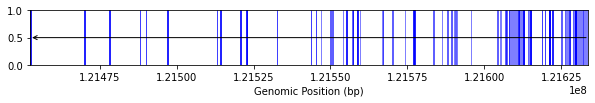

In [185]:
import pyensembl
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Instantiate the Ensembl database object
ensembl = pyensembl.EnsemblRelease()

# Define the gene name you want to get the chromosome for
gene_name = "SORL1"

gene = ensembl.genes_by_name(gene_name)[0]

# Get exon coordinates for transcript
exons = gene.exons
exon_starts = [exon.start for exon in exons]
exon_ends = [exon.end for exon in exons]
exon_directions = [exon.strand for exon in exons]

# Get intron coordinates for transcript
intron_starts = [exon_ends[i] for i in range(len(exon_ends)-1)]
intron_ends = [exon_starts[i+1] for i in range(len(exon_starts)-1)]
intron_directions = [exons[i].strand for i in range(len(exons)-1)]

# Get gene coordinates
gene_start = gene.start
gene_end = gene.end
gene_direction = gene.strand

fig, ax = plt.subplots(figsize=(10, 1))

# Plot exons
for start, end in zip(exon_starts, exon_ends):
    ax.axvspan(start, end, alpha=0.5, color="blue")

# Plot introns
#for start, end in zip(intron_starts, intron_ends):
    #ax.axvspan(start, end, alpha=0.5, color="gray")

# Plot gene as an arrow
if gene_direction == 1:
    arrow = FancyArrowPatch((gene_start, 0.5), (gene_end, 0.5), arrowstyle='->', mutation_scale=10, color='black')
else:
    arrow = FancyArrowPatch((gene_end, 0.5), (gene_start, 0.5), arrowstyle='->', mutation_scale=10, color='black')
ax.add_patch(arrow)


# Set axis limits
ax.set_xlim(gene_start, gene_end)
ax.set_ylim(0, 1)

# Set axis labels
ax.set_xlabel("Genomic Position (bp)")

plt.show()

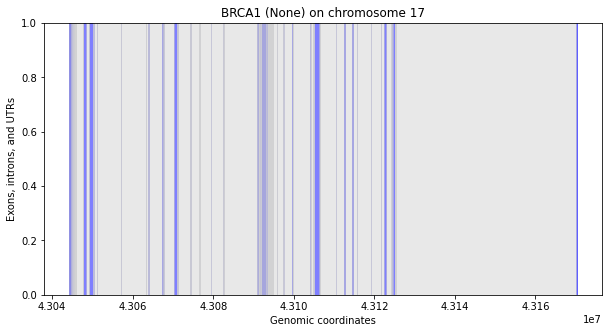

In [113]:
# Get exon coordinates for transcript
exons = gene.exons
exon_starts = [exon.start for exon in exons]
exon_ends = [exon.end for exon in exons]

# Get intron coordinates for transcript
intron_starts = [exon_ends[i] for i in range(len(exon_ends)-1)]
intron_ends = [exon_starts[i+1] for i in range(len(exon_starts)-1)]

# Get gene coordinates
gene_start = gene.start
gene_end = gene.end

# Plot exons
for start, end in zip(exon_starts, exon_ends):
    ax5.axvspan(start, end, alpha=0.5, color="blue")

# Plot introns
for start, end in zip(intron_starts, intron_ends):
    ax5.axvspan(start, end, alpha=0.5, color="lightgray")



# Add gene name and chromosome to plot
ax5.set_title(f"{gene_name} ({refseq_transcript_id}) on chromosome {chromosome}")
ax5.set_xlabel("Genomic coordinates")
ax5.set_ylabel("Exons, introns, and UTRs")

# Show plot
plt.show()

In [28]:
chrom_names = bw.chroms().keys()

for chrom_name in chrom_names:
    # Get the length of the chromosome
    chrom_length = bw.chroms()[chrom_name]
    
    # Get the start and end positions of each interval in the chromosome
    intervals = bw.intervals(chrom_name)
    
    # Print the chromosome name, length, and the first interval bounds
    print(f"Chromosome {chrom_name} has length {chrom_length}")
    if intervals:
        first_interval = intervals[0]
        print(f"First interval starts at {first_interval[0]} and ends at {first_interval[1]}")

Chromosome 1 has length 249250621
First interval starts at 10003 and ends at 10009
Chromosome 10 has length 135534747
First interval starts at 63573 and ends at 63615
Chromosome 11 has length 135006516
First interval starts at 76962 and ends at 76981
Chromosome 12 has length 133851895
First interval starts at 60463 and ends at 60626
Chromosome 13 has length 115169878
First interval starts at 19020058 and ends at 19020216
Chromosome 14 has length 107349540
First interval starts at 19000010 and ends at 19000017
Chromosome 15 has length 102531392
First interval starts at 20000014 and ends at 20000015
Chromosome 16 has length 90354753
First interval starts at 60376 and ends at 60452
Chromosome 17 has length 81195210
First interval starts at 174 and ends at 190
Chromosome 18 has length 78077248
First interval starts at 10000 and ends at 10001
Chromosome 19 has length 59128983
First interval starts at 61252 and ends at 61292
Chromosome 2 has length 243199373
First interval starts at 10047 an

In [ ]:
pg.